In [1]:
import tushare as ts
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import pandas as pd
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False
ts.set_token('5f74ec7e9d0e71e8b8174fc48550635013e084a53d63af4cac832ab3')
pro = ts.pro_api()

stock = '002547'
start_date = '20190201'
end_date = (date.today() - timedelta(days=1)).strftime('%Y%m%d')

# 获取该股票的所有分时数据
def getTickData(tick_date, stock):
    df = ts.get_tick_data(stock, date=tick_date,src='tt')
    df['day_date'] = tick_date
    return df

# 获取所有交易日期
df_date = pro.trade_cal(exchange='', start_date=start_date, end_date=end_date)
date_list = df_date[df_date['is_open'] == 1].cal_date.values

In [17]:
# 获取所有日期的分时数据
total_num = len(date_list)
n = 1
df_list = []
for i in date_list:
    if n % 10 == 0:
        print(str(n) + '/' + str(total_num))
    # 转化日期格式
    stock_date = datetime.strptime(i, '%Y%m%d').strftime('%Y-%m-%d')
    # 9:40 增量 9:50 增量 10:00 增量
    df = getTickData(stock_date, stock)
    df_list.append(df)
    n += 1

10/203
20/203
30/203
40/203
50/203
60/203
70/203
80/203
90/203
100/203
110/203
120/203
130/203
140/203
150/203
160/203
170/203
180/203
190/203
200/203


In [18]:
df_res = pd.read_csv('./stock_tick.csv')

In [18]:
df_res = pd.concat(df_list, axis=0)
df_res.to_csv('./stock_tick.csv', encoding='utf-8-sig')

,amount,change,day_date,price,time,type,volume
0,348936,0.04,2019-12-05,8.04,09:25:05,卖盘,434
1,37788,0.00,2019-12-05,8.04,09:30:01,卖盘,47
2,797339,0.02,2019-12-05,8.06,09:30:05,买盘,989
3,90354,0.01,2019-12-05,8.07,09:30:07,买盘,112
4,53202,0.00,2019-12-05,8.07,09:30:09,买盘,66
5,40350,0.00,2019-12-05,8.07,09:30:12,买盘,50
6,211282,0.00,2019-12-05,8.07,09:30:16,买盘,262
7,105741,0.01,2019-12-05,8.08,09:30:19,买盘,131
8,53287,0.00,2019-12-05,8.08,09:30:21,买盘,66
9,141369,-0.01,2019-12-05,8.07,09:30:24,卖盘,175


In [62]:
df1 = df_res[df_res['time'] < '10:32:00'].groupby('day_date').agg({'volume': 'sum'})

In [63]:
df2 = df_res.groupby('day_date').agg({'volume': 'sum'}).rename(columns={'volume': 'total'})

In [50]:
import seaborn as sns
sns.set()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


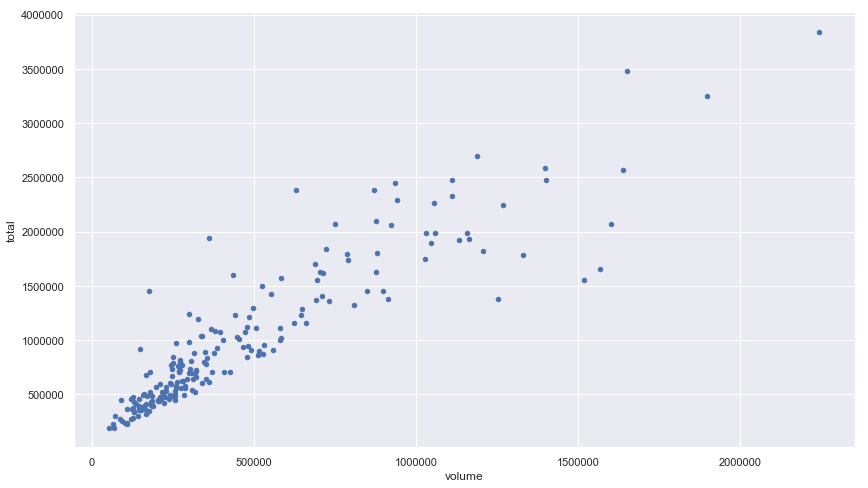

In [64]:
df3 = df1.join(df2)
df3.plot(x='volume', y='total',figsize=(14, 8), kind='scatter')

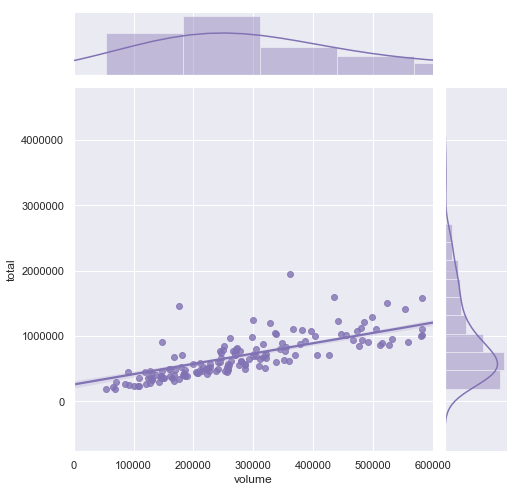

In [66]:
sns.set(style="darkgrid")

sns.jointplot("volume", "total", data=df3, kind="reg", color="m", xlim=(0, 600000), height=7)